# Loan Approval Prediction

## Dataset: Load_Approval_Dataset (KAGGLE)
### Importing necessary libraries

In [149]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
import plotly.graph_objects as go 

from sklearn.model_selection import train_test_split , GridSearchCV , StratifiedKFold , cross_val_score
from sklearn.preprocessing import OneHotEncoder , StandardScaler , OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay , classification_report, precision_recall_curve,
                             roc_curve, roc_auc_score, precision_score, recall_score, f1_score,
                             average_precision_score)

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

### Loading the dataset and creating its dataframe

In [116]:
filepath = "D:\\Datasets\\Loam Approval Prediction Dataset\\loan_approval_dataset.csv"

df = pd.read_csv(filepath)

In [117]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### Exploratory Data Analysis

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [119]:
rows , columns = df.shape

print("Rows: " , rows , "\nColumns: " , columns)

Rows:  4269 
Columns:  13


In [120]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [121]:
df.describe(include=['object'])

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


In [122]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [123]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [124]:
df.columns = df.columns.str.strip()

In [125]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

Text(0.5, 1.0, 'Loan Status Distribution')

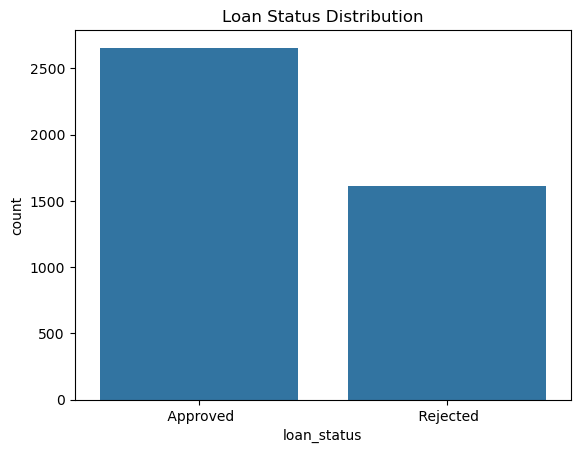

In [107]:
df['loan_status'].value_counts(normalize=True) 
sns.countplot(data=df, x='loan_status')
plt.title('Loan Status Distribution')


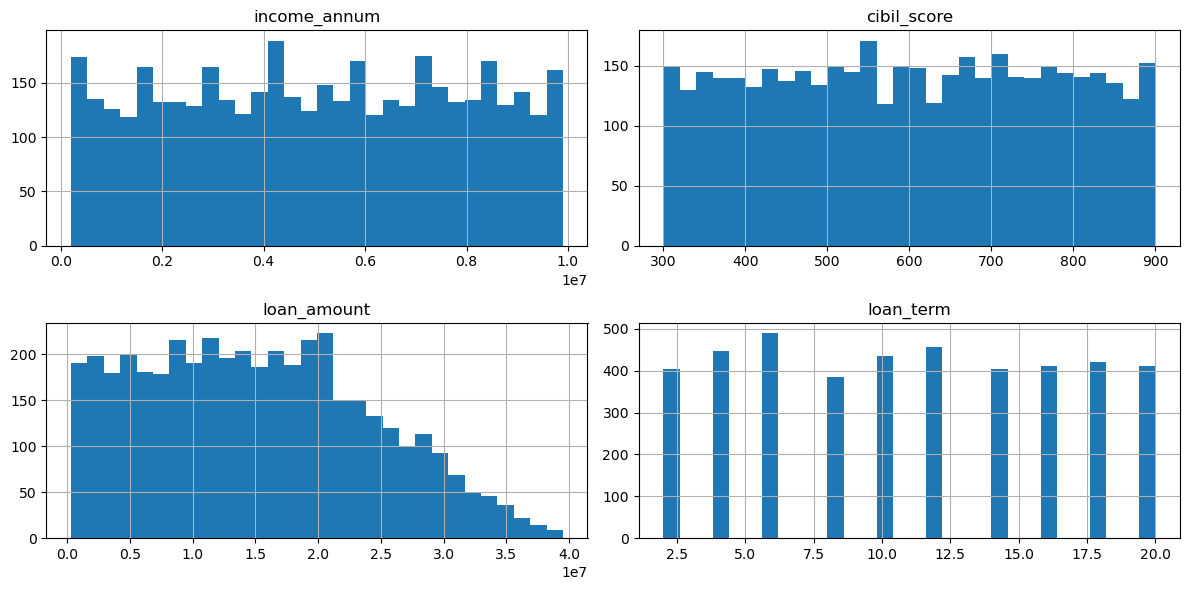

In [76]:
num_cols = ['income_annum','cibil_score','loan_amount','loan_term']
df[num_cols].hist(bins=30, figsize=(12,6))
plt.tight_layout()


In [77]:


cat_cols = [
    'no_of_dependents',
    'education',
    'self_employed',
    'residential_assets_value',
    'commercial_assets_value',
    'luxury_assets_value',
    'bank_asset_value'
]

for col in cat_cols:
    temp_df = df[col].value_counts().reset_index()
    temp_df.columns = [col, 'count']  # rename columns properly
    fig = px.bar(
        temp_df,
        x=col,
        y='count',
        title=f'Distribution of {col}',
        color=col,
        text='count'
    )
    fig.update_traces(textposition='outside')
    fig.show()


loan_status,Approved,Rejected
no_of_dependents,,
0,0.641854,0.358146
1,0.616930,0.383070
2,0.622881,0.377119
3,0.628611,0.371389
4,0.618351,0.381649
5,0.603269,0.396731


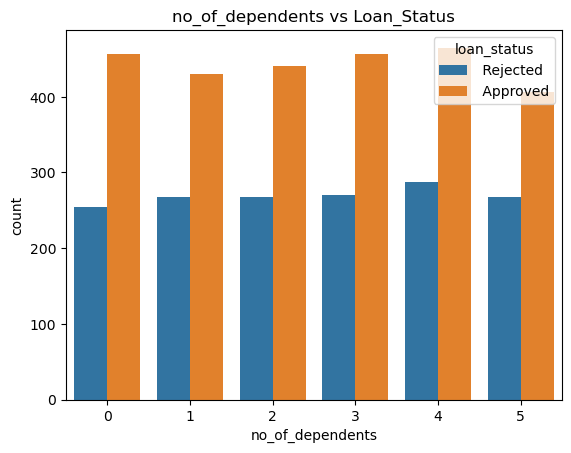

loan_status,Approved,Rejected
education,,
Graduate,0.624534,0.375466
Not Graduate,0.619765,0.380235


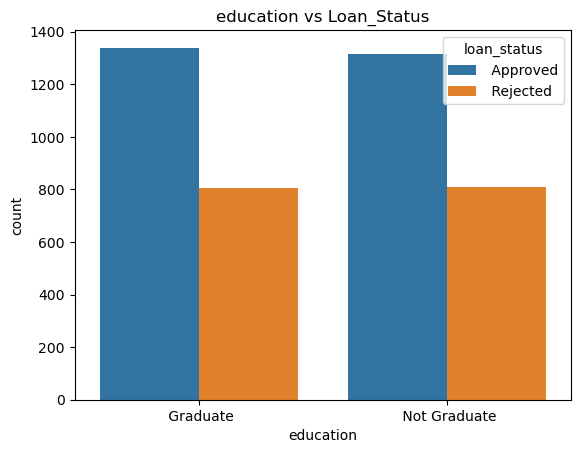

loan_status,Approved,Rejected
self_employed,,
No,0.621992,0.378008
Yes,0.622326,0.377674


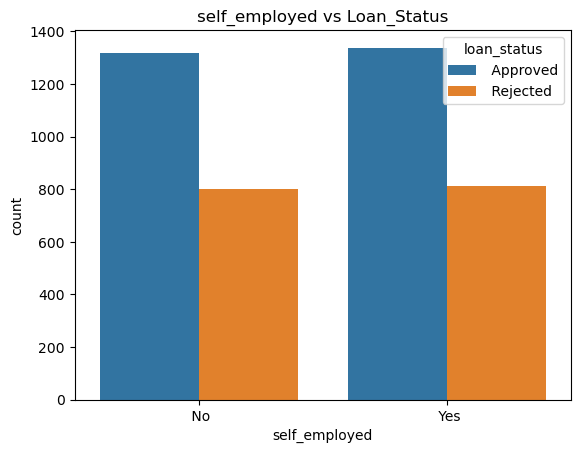

loan_status,Approved,Rejected
residential_assets_value,,
-100000,0.571429,0.428571
0,0.622222,0.377778
100000,0.550000,0.450000
200000,0.640000,0.360000
300000,0.653846,0.346154
...,...,...
28300000,1.000000,0.000000
28400000,1.000000,0.000000
28500000,0.500000,0.500000


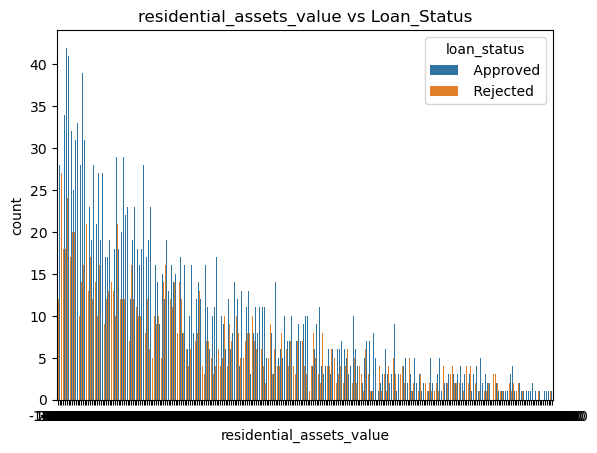

loan_status,Approved,Rejected
commercial_assets_value,,
0,0.607477,0.392523
100000,0.620000,0.380000
200000,0.633663,0.366337
300000,0.577778,0.422222
400000,0.591549,0.408451
...,...,...
18700000,0.000000,1.000000
18800000,0.000000,1.000000
18900000,1.000000,0.000000


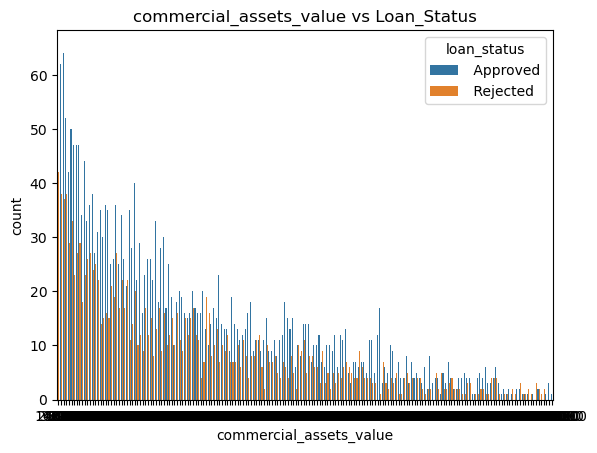

loan_status,Approved,Rejected
luxury_assets_value,,
300000,0.750000,0.250000
400000,0.700000,0.300000
500000,0.642857,0.357143
600000,0.642857,0.357143
700000,0.571429,0.428571
...,...,...
38100000,1.000000,0.000000
38200000,0.500000,0.500000
38600000,1.000000,0.000000


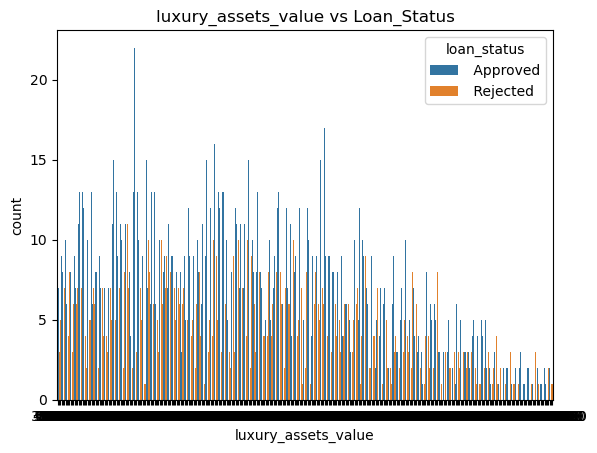

loan_status,Approved,Rejected
bank_asset_value,,
0,0.625000,0.375000
100000,0.580645,0.419355
200000,0.666667,0.333333
300000,0.600000,0.400000
400000,0.740000,0.260000
...,...,...
14200000,0.500000,0.500000
14300000,1.000000,0.000000
14400000,0.000000,1.000000


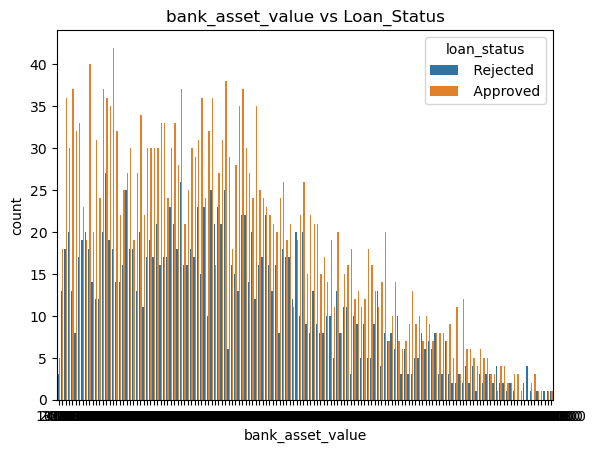

In [78]:
for col in cat_cols:
    display(pd.crosstab(df[col], df['loan_status'], normalize='index'))
    sns.countplot(data=df, x=col, hue='loan_status')
    plt.title(f'{col} vs Loan_Status')
    plt.show()


Text(0.5, 1.0, 'ApplicantIncome by Loan_Status')

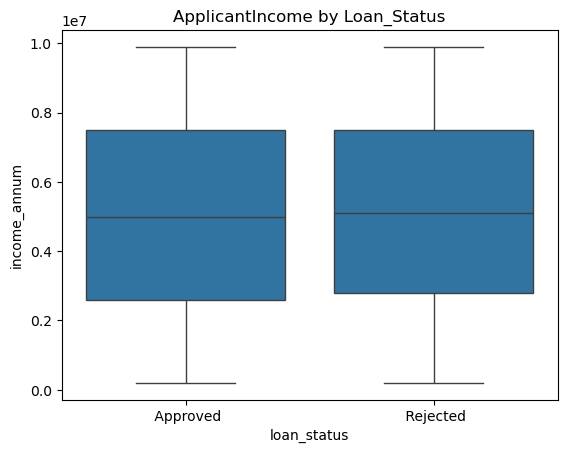

In [79]:
sns.boxplot(data=df, x='loan_status', y='income_annum')
plt.title('ApplicantIncome by Loan_Status')


<Axes: >

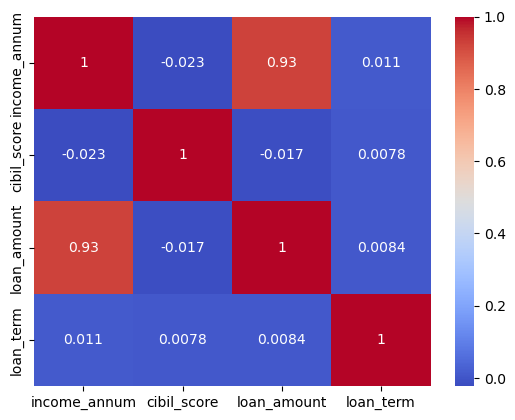

In [80]:
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')


### Preprocessing

In [126]:
print("Possible target columns:", [col for col in df.columns if 'status' in col.lower()])


Possible target columns: ['loan_status']


In [127]:
print("Unique values in loan_status before cleaning:")
print(df['loan_status'].unique())


Unique values in loan_status before cleaning:
[' Approved' ' Rejected']


In [130]:
# Convert to string, strip spaces, and uppercase
df['loan_status'] = df['loan_status'].astype(str).str.strip().str.upper()

# Map to Y/N
df['loan_status'] = df['loan_status'].replace({
    'APPROVED':'Y', 'REJECTED':'N', 
})


In [131]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Y
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,N
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,N
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,N
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,N


In [132]:
print("Missing values before cleaning:")
print(df.isna().sum())

# Drop rows where target is missing (if any)
df = df.dropna(subset=['loan_status'])


Missing values before cleaning:
loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


In [133]:
target = 'loan_status'

# Drop unique IDs or unnecessary identifiers
drop_cols = [c for c in ['loan_id'] if c in df.columns]
X = df.drop(columns=drop_cols + [target])
y = df[target].map({'Y':1, 'N':0})

print("Feature shape:", X.shape)
print("Target shape:", y.shape)
print("Missing values in y:", y.isna().sum())


Feature shape: (4269, 11)
Target shape: (4269,)
Missing values in y: 0


In [134]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])


### Train_Test_Splitting

In [135]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")



Train shape: (3415, 11), Test shape: (854, 11)


In [136]:
preprocessor.fit(X_train)
X_train_prep = preprocessor.transform(X_train)
X_test_prep = preprocessor.transform(X_test)

### Model Fitting

In [137]:
# Logistic Regression baseline
lr = LogisticRegression(max_iter=1000, class_weight=None)  # we'll try class_weight later
lr.fit(X_train_prep, y_train)
y_pred_lr = lr.predict(X_test_prep)
y_prob_lr = lr.predict_proba(X_test_prep)[:,1]

# Decision Tree baseline
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_prep, y_train)
y_pred_dt = dt.predict(X_test_prep)
y_prob_dt = dt.predict_proba(X_test_prep)[:,1]


In [138]:
from sklearn.metrics import classification_report, confusion_matrix
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr, digits=4))
print(confusion_matrix(y_test, y_pred_lr))

print("Decision Tree")
print(classification_report(y_test, y_pred_dt, digits=4))
print(confusion_matrix(y_test, y_pred_dt))


Logistic Regression
              precision    recall  f1-score   support

           0     0.8839    0.8483    0.8657       323
           1     0.9099    0.9322    0.9209       531

    accuracy                         0.9005       854
   macro avg     0.8969    0.8903    0.8933       854
weighted avg     0.9001    0.9005    0.9000       854

[[274  49]
 [ 36 495]]
Decision Tree
              precision    recall  f1-score   support

           0     1.0000    0.9659    0.9827       323
           1     0.9797    1.0000    0.9897       531

    accuracy                         0.9871       854
   macro avg     0.9899    0.9830    0.9862       854
weighted avg     0.9874    0.9871    0.9871       854

[[312  11]
 [  0 531]]


### Handling class imbalance by SMOTE

In [139]:
smote = SMOTE(random_state=42, k_neighbors=5)

# Use imbalanced-learn Pipeline so SMOTE is only applied on training fold in CV
pipeline_lr = ImbPipeline([
    ('pre', preprocessor),
    ('smote', smote),
    ('clf', LogisticRegression(max_iter=2000))
])

pipeline_dt = ImbPipeline([
    ('pre', preprocessor),
    ('smote', smote),
    ('clf', DecisionTreeClassifier(random_state=42))
])

pipeline_lr.fit(X_train, y_train)
pipeline_dt.fit(X_train, y_train)

y_pred_lr_smote = pipeline_lr.predict(X_test)
y_prob_lr_smote = pipeline_lr.predict_proba(X_test)[:,1]


### Model Tuning

In [146]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid_lr = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__penalty': ['l2'],
    'clf__solver': ['liblinear', 'lbfgs']
}

gs_lr = GridSearchCV(pipeline_lr, param_grid_lr, scoring='f1', cv=cv, n_jobs=-1)
gs_lr.fit(X_train, y_train)

print("Best LR params:", gs_lr.best_params_)
best_lr = gs_lr.best_estimator_


Best LR params: {'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}


In [147]:
param_grid_dt = {
    'clf__max_depth': [3,5,7,10,None],
    'clf__min_samples_leaf': [1,2,5,10],
    'clf__criterion': ['gini','entropy']
}
gs_dt = GridSearchCV(pipeline_dt, param_grid_dt, scoring='f1', cv=cv, n_jobs=-1)
gs_dt.fit(X_train, y_train)
print("Best DT params:", gs_dt.best_params_)
best_dt = gs_dt.best_estimator_


Best DT params: {'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__min_samples_leaf': 5}


### Detailed Model Evaluation

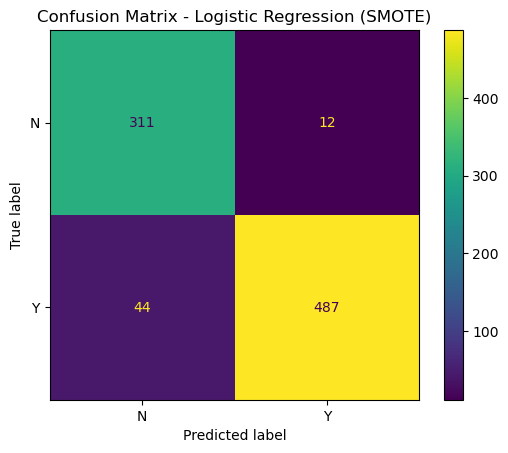

In [150]:

ConfusionMatrixDisplay.from_estimator(best_lr, X_test, y_test, display_labels=['N','Y'])
plt.title("Confusion Matrix - Logistic Regression (SMOTE)")
plt.show()


In [151]:
y_pred = best_lr.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.8761    0.9628    0.9174       323
           1     0.9760    0.9171    0.9456       531

    accuracy                         0.9344       854
   macro avg     0.9260    0.9400    0.9315       854
weighted avg     0.9382    0.9344    0.9350       854



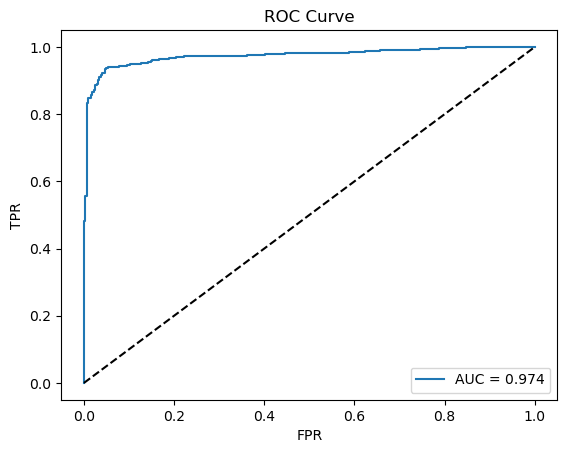

In [152]:
fpr, tpr, _ = roc_curve(y_test, best_lr.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, best_lr.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.legend(); plt.title('ROC Curve')
plt.show()


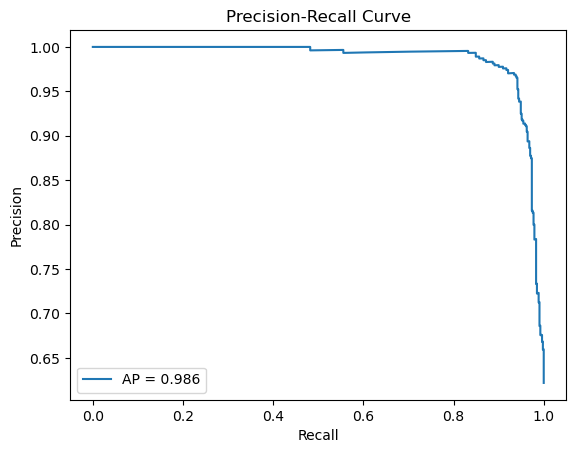

In [153]:
precision, recall, thresholds = precision_recall_curve(y_test, best_lr.predict_proba(X_test)[:,1])
avg_prec = average_precision_score(y_test, best_lr.predict_proba(X_test)[:,1])
plt.plot(recall, precision, label=f'AP = {avg_prec:.3f}')
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Precision-Recall Curve')
plt.legend(); plt.show()


### Threshold Tuning

In [154]:
probs = best_lr.predict_proba(X_test)[:,1]
for thresh in [0.25, 0.4, 0.5, 0.6]:
    preds = (probs >= thresh).astype(int)
    print(f"threshold={thresh}: precision={precision_score(y_test,preds):.3f}, recall={recall_score(y_test,preds):.3f}, f1={f1_score(y_test,preds):.3f}")


threshold=0.25: precision=0.837, recall=0.974, f1=0.900
threshold=0.4: precision=0.920, recall=0.951, f1=0.935
threshold=0.5: precision=0.976, recall=0.917, f1=0.946
threshold=0.6: precision=0.989, recall=0.851, f1=0.915


In [160]:
ct = pd.crosstab(df['residential_assets_value'], df['loan_status'], normalize='index').reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(x=ct['residential_assets_value'], y=ct['Y'], name='Approved'))
fig.add_trace(go.Bar(x=ct['residential_assets_value'], y=ct['N'], name='Rejected'))
fig.update_layout(barmode='stack', title="Approval by Property Area")
fig.show()


In [161]:
cm = confusion_matrix(y_test, y_pred)
fig = go.Figure(data=go.Heatmap(z=cm, x=['Pred N','Pred Y'], y=['True N','True Y'], text=cm, texttemplate="%{text}"))
fig.update_layout(title="Confusion Matrix")
fig.show()


In [162]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=recall, y=precision, mode='lines', name='PR curve'))
fig.update_layout(xaxis_title='Recall', yaxis_title='Precision', title=f'PR Curve (AP={avg_prec:.3f})')
fig.show()


### Model Comparison & Selection

In [163]:
models = {'LogReg': best_lr, 'DecisionTree': best_dt}
rows = []
for name, model in models.items():
    probs = model.predict_proba(X_test)[:,1]
    preds = model.predict(X_test)
    rows.append({
        'model': name,
        'precision': precision_score(y_test,preds),
        'recall': recall_score(y_test,preds),
        'f1': f1_score(y_test,preds),
        'roc_auc': roc_auc_score(y_test,probs),
        'avg_precision': average_precision_score(y_test,probs)
    })
pd.DataFrame(rows).set_index('model')


,precision,recall,f1,roc_auc,avg_precision
model,,,,,
LogReg,0.975952,0.917137,0.945631,0.974089,0.986325
DecisionTree,0.986891,0.992467,0.989671,0.987878,0.985871
